In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
import datetime
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# Read in
audio_df = pd.read_csv("Data/audio_features.csv")
audio_df.head()

,Unnamed: 0,Artist,Track,Spotify_ID,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo,key,loudness,mode,duration_ms,time_signature
0,0,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,5,-6.134,0,295502,4
1,1,Justin Bieber,Sorry,402qo6bnZJwCN1RUenyNuM,0.679,0.748,0.0878,0,0.299,0.438,100.035,0,-3.624,0,200787,4
2,2,Drake,Hotline Bling,0wwPcA6wtMf6HUMpIRdeP7,0.891,0.628,0.00258,0.00019,0.0504,0.552,134.966,2,-7.863,1,267067,4
3,3,Justin Bieber,Love Yourself,3dNcOt7h5DuBgahMkOrL1m,0.759,0.401,0.86,0,0.299,0.576,100.126,4,-8.999,1,232627,4
4,4,Justin Bieber,What Do You Mean?,4Vx8DGMNlFt6q3yxVoV8qK,0.832,0.631,0.585,0.000892,0.0838,0.836,125.038,5,-6.19,0,208543,4


In [5]:
# Read in
billboard_df = pd.read_csv("Data/billboard_hot100_16-21.csv")
billboard_df.head()

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
0,2016-01-02,Hello,Adele,1,False,NaN,1,1,8
1,2016-01-02,Sorry,Justin Bieber,2,False,NaN,2,2,8
2,2016-01-02,Hotline Bling,Drake,3,False,NaN,2,3,20
3,2016-01-02,Love Yourself,Justin Bieber,4,False,NaN,4,5,5
4,2016-01-02,What Do You Mean?,Justin Bieber,5,False,NaN,1,4,16


In [6]:
# Merge
audio_df_path = "Data/audio_features.csv"
billboard_path = "Data/billboard_hot100_16-21.csv"

audio_df = pd.read_csv(audio_df_path)
billboard_df = pd.read_csv(billboard_path)
audio_df.rename(columns={'Track':'Title'}, inplace=True)
audio_df.drop(columns="Unnamed: 0", inplace=True)

merge_df = pd.merge(audio_df, billboard_df, how="right", on=["Title","Artist"])
merge_df.drop(columns="Image", inplace=True)
merge_df.drop(merge_df.loc[merge_df.Spotify_ID=="not found"].index, inplace = True)
merge_df

,Artist,Title,Spotify_ID,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo,...,loudness,mode,duration_ms,time_signature,Date,Rank,Is_New,Peak_Posistion,Last_Position,Weeks
0,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-02,1,False,1,1,8
1,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-09,1,False,1,1,9
2,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-16,1,False,1,1,10
3,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-23,2,False,1,1,11
4,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-30,2,False,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28595,Tom MacDonald,Snowflakes,6gcRcCkx2K09BucndWZMCS,0.53,0.826,0.0209,0,0.0915,0.277,95.99,...,-6.369,1,229375,4,2021-06-19,71,True,71,0,1
28596,Lil Baby & Lil Durk,That's Facts,6dug6dIV40JMz2myhafHrm,0.884,0.577,0.0843,0,0.0602,0.854,137.032,...,-4.716,1,218611,4,2021-06-19,73,True,73,0,1
28597,Lil Baby & Lil Durk,Please,3zWR0zS9p39c0FVkYkHfVF,0.677,0.634,0.228,0,0.131,0.496,90.268,...,-6.231,1,206254,4,2021-06-19,79,True,79,0,1
28598,"Lil Baby, Lil Durk & Young Thug",Up The Side,2L6lh2RmMs1yz4FQzdbwOn,0.644,0.563,0.0518,0,0.179,0.339,160.106,...,-9.814,0,218417,4,2021-06-19,80,True,80,0,1


In [19]:
billboard_df.sort_values("Weeks", inplace = True)
billboard_df.drop_duplicates(subset = "Title", keep = 'last',
                       inplace = True)
billboard_df

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
25580,2020-11-21,Crazy Story 2.0,King Von Featuring Lil Durk,81,True,NaN,81,0,1
19160,2019-08-31,Surf,Young Thug Featuring Gunna,61,True,NaN,61,0,1
19169,2019-08-31,Sup Mate,Young Thug Featuring Future,70,True,NaN,70,0,1
27898,2021-05-01,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,True,NaN,99,0,1
27845,2021-05-01,Diamonds Dancing,Young Thug & Gunna Featuring Travis Scott,46,True,NaN,46,0,1
...,...,...,...,...,...,...,...,...,...
1148,2016-03-19,See You Again,Wiz Khalifa Featuring Charlie Puth,49,False,NaN,1,45,52
6031,2017-02-25,Cheap Thrills,Sia Featuring Sean Paul,32,False,NaN,1,30,52
12233,2018-05-05,Wake Me Up!,Avicii,34,False,NaN,4,0,54
921,2016-03-05,Uptown Funk!,Mark Ronson Featuring Bruno Mars,22,False,NaN,1,0,56


In [20]:
billboard_top_ten = billboard_df.nlargest(10, "Weeks")
billboard_top_ten.head(10)

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
27017,2021-03-06,I Hope,Gabby Barrett Featuring Charlie Puth,18,False,NaN,3,19,61
921,2016-03-05,Uptown Funk!,Mark Ronson Featuring Bruno Mars,22,False,NaN,1,0,56
12233,2018-05-05,Wake Me Up!,Avicii,34,False,NaN,4,0,54
24728,2020-09-26,The Bones,Maren Morris,29,False,NaN,12,28,52
1148,2016-03-19,See You Again,Wiz Khalifa Featuring Charlie Puth,49,False,NaN,1,45,52
6031,2017-02-25,Cheap Thrills,Sia Featuring Sean Paul,32,False,NaN,1,30,52
10927,2018-02-03,Believer,Imagine Dragons,28,False,NaN,4,26,51
19531,2019-09-28,Without Me,Halsey,32,False,NaN,1,40,50
25134,2020-10-24,Don't Start Now,Dua Lipa,35,False,NaN,2,39,50
128,2016-01-09,Trap Queen,Fetty Wap,29,False,NaN,2,31,49


In [21]:
x_axis = np.arange(len(billboard_top_ten))
tick_locations = [value+0.4 for value in x_axis]

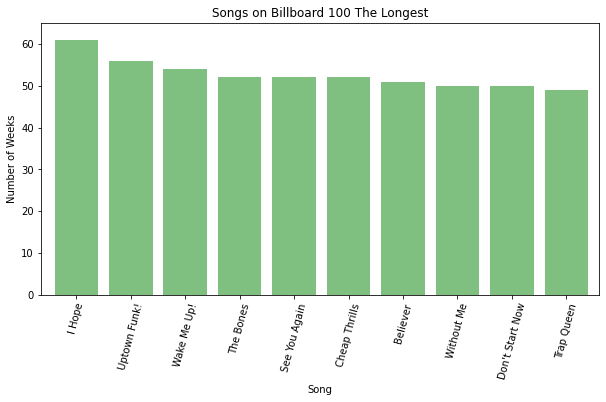

In [22]:
# Songs on billboard 100 for longest time
plt.figure(figsize=(10,5))
plt.bar(x_axis, billboard_top_ten["Weeks"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, billboard_top_ten["Title"], rotation=75)
plt.xlim(-0.25, len(x_axis)-0.0)
weeks = [55]
plt.ylim(0, max(weeks)+10) 
plt.title("Songs on Billboard 100 The Longest")
plt.xlabel("Song")
plt.ylabel("Number of Weeks")
plt.show()

In [24]:
# Correlation

corr = audio_df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence]].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid') 



plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

SyntaxError: EOL while scanning string literal (<ipython-input-24-40513bec5625>, line 4)

In [25]:
# Unique Artist Count Billboard
unique_artist = audio_df["Artist"].nunique()
print(unique_artist)

1545


In [33]:
# Artists with most songs in top 100
top_artists = audio_df['Artist'].value_counts()[:10]
top_artists.head(10)

Drake                         71
Taylor Swift                  60
Lil Uzi Vert                  37
YoungBoy Never Broke Again    36
Ariana Grande                 36
Future                        34
The Weeknd                    34
J. Cole                       34
Post Malone                   27
Juice WRLD                    26
Name: Artist, dtype: int64

In [34]:
songs = [71, 60, 37, 36, 36, 34, 34, 34, 27, 26]
x_axis = np.arange(len(songs))
print(x_axis)

[0 1 2 3 4 5 6 7 8 9]


Text(0, 0.5, 'Number of Songs')

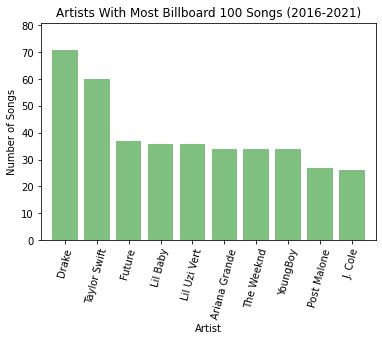

In [35]:
# Plotting Bar Chart
plt.bar(x_axis, songs, color = 'g', alpha=0.5,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Drake", "Taylor Swift", "Future", "Lil Baby", "Lil Uzi Vert",
       "Ariana Grande", "The Weeknd", "YoungBoy",
       "Post Malone", "J. Cole"], rotation = 75)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(songs)+10) 
plt.title("Artists With Most Billboard 100 Songs (2016-2021)")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")

In [29]:
# New Tracks per Week
new_songs = billboard_df


In [30]:

artist_list = top_artists.index[:10]
print(artist_list)
df_artists = merge_df[merge_df.isin(artist_list)][['Artist','Date','energy']].groupby(['Artist','energy']).count().reset_index()
df_artists.rename(columns={'energy':'Song_Count'}, inplace=True)
df_artists.head(10)

Index(['Drake', 'Taylor Swift', 'Lil Uzi Vert', 'YoungBoy Never Broke Again',
       'Ariana Grande', 'Future', 'The Weeknd', 'J. Cole', 'Post Malone',
       'Juice WRLD'],
      dtype='object')


,Artist,Song_Count,Date


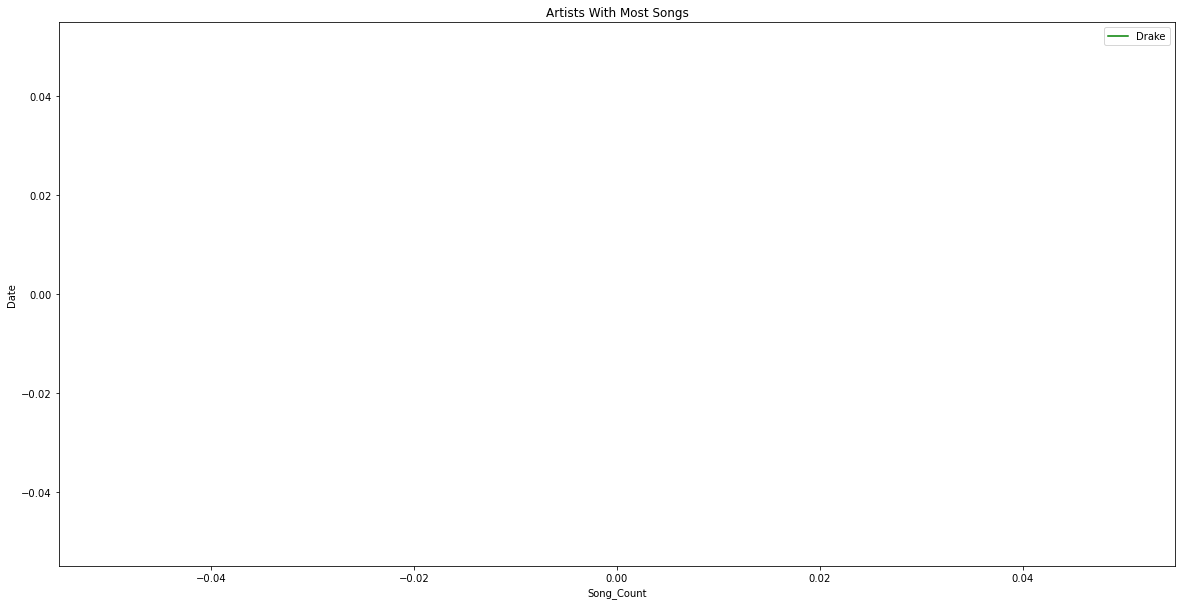

In [31]:
x = np.arange(0, 4 * np.pi, 0.1)
y = np.sin(x)
plt.figure(figsize=(20,10))
plt.plot('Date','Song_Count', color='g', data=df_artists)
plt.title('Artists With Most Songs')
plt.xlabel('Song_Count')
plt.ylabel('Date')
plt.legend(['Drake','Taylor Swift'], loc = 0)

In [42]:
billboard_df2 = pd.read_csv("Data/billboard_hot100_16-21.csv")
billboard_df2.head()

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
0,2016-01-02,Hello,Adele,1,False,NaN,1,1,8
1,2016-01-02,Sorry,Justin Bieber,2,False,NaN,2,2,8
2,2016-01-02,Hotline Bling,Drake,3,False,NaN,2,3,20
3,2016-01-02,Love Yourself,Justin Bieber,4,False,NaN,4,5,5
4,2016-01-02,What Do You Mean?,Justin Bieber,5,False,NaN,1,4,16


In [44]:
billboard_df2.Is_New.value_counts()

False    25681
True      2919
Name: Is_New, dtype: int64

In [45]:
new_songs = billboard_df2.Is_New.sum()
new_songs

2919

In [46]:
repeat_songs = (~billboard_df2.Is_New).sum()
repeat_songs

25681

In [55]:
billboard_df2['Year'] = pd.DatetimeIndex(billboard_df2['Date']).year
billboard_df2.head()

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks,Year
0,2016-01-02,Hello,Adele,1,False,NaN,1,1,8,2016
1,2016-01-02,Sorry,Justin Bieber,2,False,NaN,2,2,8,2016
2,2016-01-02,Hotline Bling,Drake,3,False,NaN,2,3,20,2016
3,2016-01-02,Love Yourself,Justin Bieber,4,False,NaN,4,5,5,2016
4,2016-01-02,What Do You Mean?,Justin Bieber,5,False,NaN,1,4,16,2016


In [57]:
year = billboard_df2['Year']

ValueError: x and y must have same first dimension, but have shapes (28600,) and (1,)

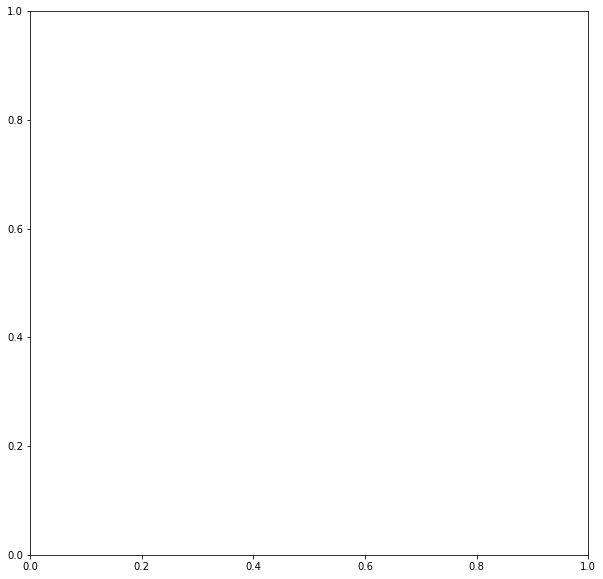

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(billboard_df2['Year'], billboard_df2['Is_New'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="News Songs",
       title="New Songs Per Year")

plt.show()